# Custom training: walkthrough

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

## Import Iris setosa dataset

In [5]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /Users/luke/.keras/datasets/iris_training.csv


In [6]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [7]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [8]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


In [12]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
array([5.6, 5.7, 7.2, 6.7, 5.6, 6.4, 6.8, 4.5, 4.7, 5. , 4.9, 5.8, 5. ,
       5. , 4.9, 7.2, 4.9, 5.4, 4.8, 5. , 6. , 6.9, 6.4, 6.4, 5.7, 5.1,
       5.1, 5.4, 7.6, 6. , 5.8, 5.9], dtype=float32)>), ('sepal_width', <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
array([2.9, 4.4, 3.6, 3. , 2.5, 2.7, 3.2, 2.3, 3.2, 2.3, 3.1, 2.7, 3. ,
       3.4, 3. , 3.2, 2.5, 3.9, 3. , 3.6, 2.2, 3.1, 3.1, 2.8, 2.9, 2.5,
       3.7, 3.7, 3. , 2.7, 2.7, 3.2], dtype=float32)>), ('petal_length', <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
array([3.6, 1.5, 6.1, 5. , 3.9, 5.3, 5.9, 1.3, 1.6, 3.3, 1.5, 4.1, 1.6,
       1.6, 1.4, 6. , 4.5, 1.3, 1.4, 1.4, 5. , 5.1, 5.5, 5.6, 4.2, 3. ,
       1.5, 1.5, 6.6, 5.1, 5.1, 4.8], dtype=float32)>), ('petal_width', <tf.Tensor: id=67, shape=(32,), dtype=float32, numpy=
array([1.3, 0.4, 2.5, 1.7, 1.1, 1.9, 2.3, 0.3, 0.2, 1. , 0.1, 1. , 0.2,
       0.4, 0.2, 1.8, 1.7, 0.4, 0

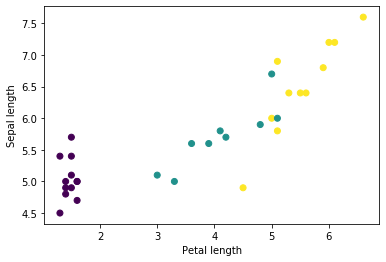

In [13]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [16]:
def pack_features_vector(features, labels):
    """Pack the features into a single array."""
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [18]:
train_dataset = train_dataset.map(pack_features_vector)

features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.6 3.2 1.4 0.2]
 [5.8 2.6 4.  1.2]
 [6.7 3.  5.2 2.3]
 [6.5 3.  5.2 2. ]
 [5.3 3.7 1.5 0.2]], shape=(5, 4), dtype=float32)


In [19]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [20]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=332, shape=(5, 3), dtype=float32, numpy=
array([[ 0.48450673, -0.2242385 ,  0.22993271],
       [ 0.39126763, -0.12316591,  0.33570385],
       [ 0.5332344 , -0.13672987,  0.3132631 ],
       [ 0.46213567, -0.06458331,  0.3127415 ],
       [ 0.56567866, -0.26853755,  0.26442218]], dtype=float32)>

In [21]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=337, shape=(5, 3), dtype=float32, numpy=
array([[0.44101277, 0.21709359, 0.34189367],
       [0.3931141 , 0.235019  , 0.37186694],
       [0.43210196, 0.22111818, 0.34677988],
       [0.4078688 , 0.2408626 , 0.35126865],
       [0.45995986, 0.19972132, 0.3403188 ]], dtype=float32)>

In [22]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0]
    Labels: [0 1 2 2 0 0 0 1 2 0 2 2 1 0 2 0 0 0 1 0 1 2 0 2 1 2 2 0 2 2 2 2]


In [23]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [25]:
def loss(model, x, y):
    y_ = model(x)

    return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 1.0263354778289795


In [26]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [27]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [28]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.0263354778289795
Step: 1,         Loss: 1.017986536026001


In [29]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 32
    for x, y in train_dataset:
        # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Track progress
        epoch_loss_avg(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        epoch_accuracy(y, model(x))

    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.053, Accuracy: 66.667%
Epoch 050: Loss: 0.333, Accuracy: 94.167%
Epoch 100: Loss: 0.208, Accuracy: 95.000%
Epoch 150: Loss: 0.159, Accuracy: 97.500%
Epoch 200: Loss: 0.128, Accuracy: 97.500%


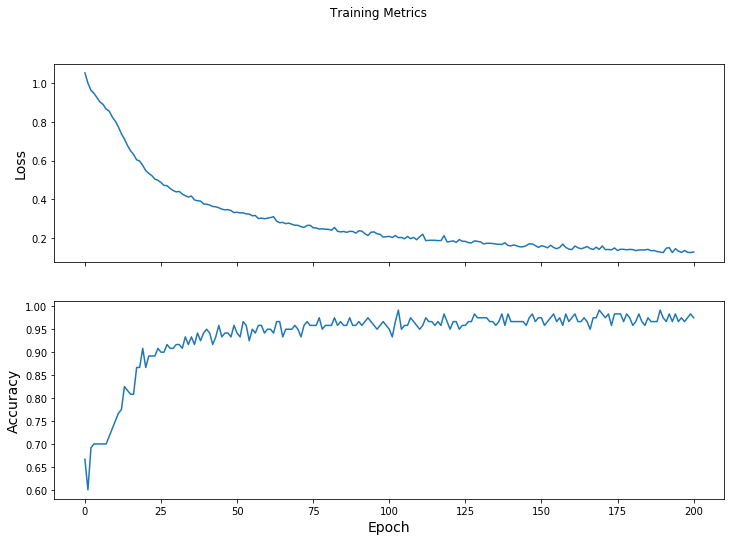

In [30]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [31]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [32]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [33]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [34]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=97778, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [35]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (98.2%)
Example 1 prediction: Iris versicolor (93.1%)
Example 2 prediction: Iris virginica (74.1%)
